# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### Imports and Data Preparation
Before doing anything, we're going to add some imports and read in the data.

In [8]:
# Matplotlib for visualization
import matplotlib as mpl
from matplotlib import pyplot as plt

# Counter for counting the major project themes in Project 2
from collections import Counter

# Load the JSON data and use json_normalize to create a DataFrame with our data
json_data = json.load((open('data/world_bank_projects.json')))
df = json_normalize(json_data)
df.head(3)

,_id.$oid,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,source,status,supplementprojectflg,theme1.Name,theme1.Percent,theme_namecode,themecode,totalamt,totalcommamt,url
0,52b213b38594d8a2be17c780,1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,IBRD,Active,N,Education for all,100,"[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,52b213b38594d8a2be17c781,2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,IBRD,Active,N,Other economic management,30,"[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,52b213b38594d8a2be17c782,2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,IBRD,Active,Y,Regional integration,46,"[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en


### Problem 1: Find 10 countries with the most projects
To solve this problem, we group by the country name and take a count of project names.

In [9]:
# Number of countries to find
n = 10

# Make sure there are no null project names
assert df['project_name'].isnull().sum() == 0 

# Group by country name and count how many project_name there are for each country
project_counts = df.groupby('countryname')[['project_name']].count()

# Sort them from greatest to least and then take the head (top n)
project_counts = project_counts.sort_values('project_name', ascending=False)
project_counts = project_counts.head(n)

# Display the results
project_counts

,project_name
countryname,
People's Republic of China,19
Republic of Indonesia,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Nepal,12
Kingdom of Morocco,12
Republic of Mozambique,11


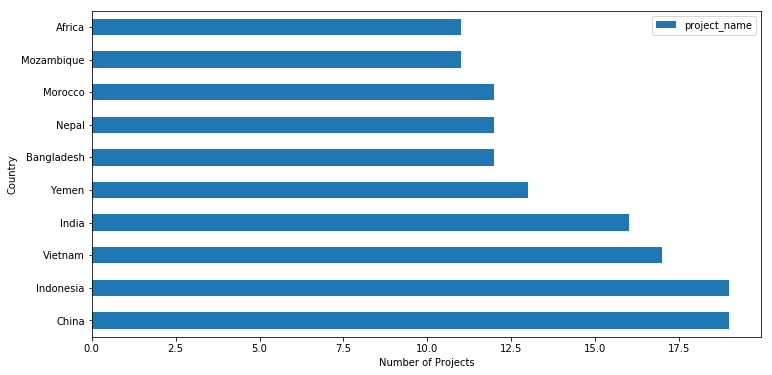

In [10]:
# Plot the data:
# First simplify the country name by getting last word of each country name
simple_names = [country.split(' ')[-1] for country in project_counts.index]
project_counts['country_name'] = simple_names

# Now plot the data
ax = project_counts.plot(x='country_name', y='project_name', kind='barh', figsize=(12,6))

# Set labels for the axes
plt.xlabel('Number of Projects')
plt.ylabel('Country')

# Show the plot
plt.show()

### Problem 2: Find the top 10 major project themes

In [11]:
# Get a DataFrame with all code, name pairs
code_name_df = pd.DataFrame(df['mjtheme_namecode'].sum())
code_name_df = code_name_df[code_name_df['name'] != ''].drop_duplicates()

# Make a dictionary with the codes and names of major themes
code_name_dict = {row['code']: row['name'] for _, row in code_name_df.iterrows()}

In [12]:
# Number of major project themes to find
n = 10

# Turn the list of theme dicts to a list of codes
def get_themes(theme_dict_list):
    theme_codes = [theme_dict['code'] for theme_dict in theme_dict_list]
    return theme_codes

# Turn theme dictionaries into lists of codes, and apply a Counter to count the themes
counter_series = df['mjtheme_namecode'].apply(get_themes).apply(Counter)

# Get total count of all the theme codes; then get the top n most commmon
theme_code_counter = counter_series.sum()
top_theme_codes = theme_code_counter.most_common(n)

# Create a DataFrame with our results
results_df = pd.DataFrame()
results_df['code'] = [code for code, _ in top_theme_codes]
results_df['count'] = [count for _, count in top_theme_codes]
results_df['name'] = results_df['code'] .apply(lambda code: code_name_dict[code])

# Show the results
results_df

,code,count,name
0,11,250,Environment and natural resources management
1,10,216,Rural development
2,8,210,Human development
3,2,199,Public sector governance
4,6,168,Social protection and risk management
5,4,146,Financial and private sector development
6,7,130,Social dev/gender/inclusion
7,5,77,Trade and integration
8,9,50,Urban development
9,1,38,Economic management


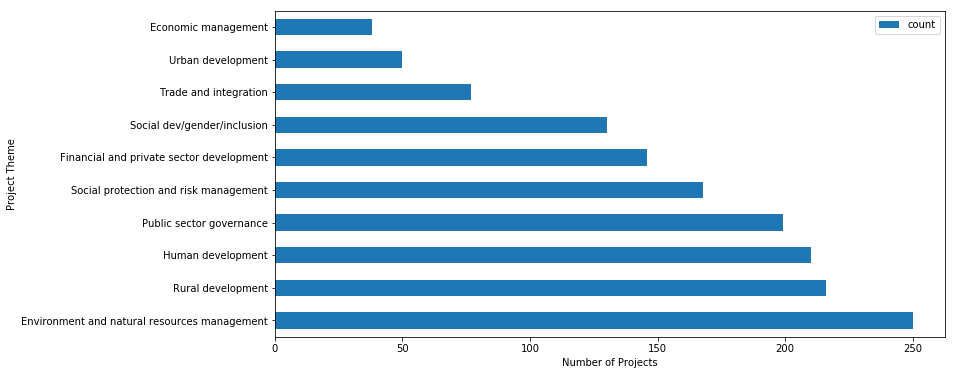

In [13]:
# Plot the results
results_df.plot(x='name', y='count', kind='barh', figsize=(12,6))

# Set labels for the axes
plt.xlabel('Number of Projects')
plt.ylabel('Project Theme')

# Show the plot
plt.show()

### Problem 3: Create a dataframe with the missing names filled in for the major theme name.

In [14]:
def fill_missing(theme_dict_list):
    # For each theme_dict, use the same 'code', but 'name' 
    # field is the name lookup from code_name_dict
    return [{'code': theme_dict['code'], 
             'name': code_name_dict[theme_dict['code']]} 
            for theme_dict in theme_dict_list]

# Apply our fill_missing function to the mjtheme_namecode column, and assign it
filled_themes = df['mjtheme_namecode'].apply(fill_missing)
df['mjtheme_namecode'] = filled_themes

# Check that it worked:

# Like before, put all the code, name pairs in the rows of a DataFrame
check_df = pd.DataFrame(df['mjtheme_namecode'].sum()) 

# Count the number of empty strings for name and code columns
missing_name_count = (check_df['name'] == '').sum()
missing_code_count = (check_df['code'] == '').sum()

# Assert the missing value counts are both zero
assert missing_name_count == 0
assert missing_code_count == 0